# Functions

### First I need to imoprt the functions 

In [16]:
#This will be used to embed images in Jupyter Notebook

from IPython.display import Image
#While importing this is important to capitalize the I and P in IPython.
#if this is not done then this might be why there is an error


#Importing modules


import sys 
#this is used to manipulate variable and functions. 
#According to online resources this is helpful mostly for run time

import os
#This is useful when dealing with differnent directories in python.
##It can remove, change, or help accese directories

import glob
#This can be helpful when trying to return a file path that follows 
#a specific parttern

from os import listdir
#Shows a file or list of all files and directories that is in a working directory

from os import path
#I am not sure what this one does



#This is for arrays
import numpy as np

#For fit files and WCS objects
import astropy.units as u
from astropy.time import Time


#plotting and drawing modules

from matplotlib import pyplot as plt
import matplotlib as mpl


#additional libraroes needed for AFINO

from scipy.io import readsav as idlsave

#import stats librarry

import scipy.stats as stats





# Defined functions 

In [74]:
def recrate(flx, h): 
    '''compue the difference formula for f'(a) with step size h.
    
    parameters 
    -----------
    flx : array that contains reconnection flux 
    h : contant cadance between observationss
    
    Returns
    ---------
    recreate: reconnection flux(a+h) - reconnection flux(a-h)/2h 
            [negative reconnection rates, posative reconnection rate]
    '''
    
    recreate  = np.zeros((2, len(flx[1,:])))
    
    nflux       = flx[1]
    pflux      = flx[0]
    recreate[1] = np.gradient(nflux, h, edge_order = 2)
    recreate[0] = np.gradient(pflux, h, edge_order = 2) 
    
    return recreate


## Check Name of File

In [65]:
# Check if .sav file exists 
def check(filename,bstr,wvstr):
    '''
    
    inputs: 
            filename -- name of the reconnection flux idl save file
            bstr     -- 
                        BLOS - normal component taken as the line of sight
                        BRAD - normal component taken as the radial magnatic field (B_r)
            wvstr    -- 
    output: 
            savname  -- full filename with extension of the reconnection flux
    '''
    for i in range(len(bstr)): 
        if path.exists(filename+bstr[i]+wvstr+".sav" ) == True:
            return  filename+bstr[i]+wvstr+".sav"
        else: 
            print('File not found!')

## Extracting variables from the saved files 

In [66]:
def extract_ribbon_vars(idlstrct):
    '''
    Written by Marcel
    Oct. 5, 2020
    Inputs  --
    Outputs --  OPTIONAL (*) 
                *dosday --?
                flx6 -- magnetic reconnection flux for pixel area with I >= median(I)*6
                flx8 -- magnetic reconnection flux for pixel area with I >= median(I)*8
                flx10 -- magnetic reconnection flux for pixel area with I >= median(I)*10
                * area6 --?
                * area8 --? 
                * area10 --?
                * ar_area --? 
                * mflx --?
                tim -- UTC time from HMI 
                * cut --? 
                * sathr --? 
                * str_brad --? 
                * tim_maxnegrecrate --?    
                * tim_maxposrecrate --?       
                * maxnegrecrate --?        
                * maxposrecrate --?         
                n_o_satpix -- number of saturated points for a given AIA image          
                * bcenx6 --?               
                * bceny6 --?             
                * bcenx8 --?            
                * bceny8 --?            
                * bcenx10 --?             
                * bceny10 --?            
                * dst6 --?                
                * dst8 --?               
                * dst10 --?               

                
    
    Extract all the idl variables 
    '''
    
    flx6                = idlstrct.flx6 
    flx8                = idlstrct.flx8
    flx10               = idlstrct.flx10 
    tim                 = list(idlstrct.tim) #object arrays are not suported by python  
    n_o_satpix          = idlstrct.n_o_satpix
    # These have been commented out because they are not used in the qpp analysis 
    #dosday              = idlstrct.dosday
    area6               = idlstrct.area6 
    area8               = idlstrct.area8 
    area10              = idlstrct.area10 
    ar_area             = idlstrct.ar_area  
    #mflx                = idlstrct.mflx
    #cut                 = idlstrct.cut
    #satthr              = idlstrct.satthr
    #dflxdt              = idlstrct.dflxdt
    #str_brad            = idlstrct.str_brad

    #tim_maxnegrecrate   = idlstrct.tim_maxnegrecrate 
    #tim_maxposrecrate   = idlstrct.tim_maxposrecrate   
    #maxnegrecrate       = idlstrct.maxnegrecrate
    #maxposrecrate       = idlstrct.maxposrecrate 
    #bcenx6              = idlstrct.bcenx6
    #bceny6              = idlstrct.bceny6
    #bcenx8              = idlstrct.bcenx8
    #bceny8              = idlstrct.bceny8
    #bcenx10             = idlstrct.bcenx10
    #bceny10             = idlstrct.bceny10
    #dst6                = idlstrct.dst6
    #dst8                = idlstrct.dst8
    #dst10               = idlstrct.dst10
    
#    return dosday,flx8,flx6,flx10,area6,area8,area10,ar_area,mflx,tim,cut,satthr,dflxdt,str_brad,tim_maxnegrecrate,tim_maxposrecrate,maxnegrecrate,maxposrecrate,n_o_satpix,bcenx6,bceny6,bcenx8,bceny8,bcenx10,bceny10,dst6,dst8,dst10 
#    return dosday,flx8,flx6,flx10,area6,area8,area10,ar_area,mflx,tim,cut,satthr,str_brad,tim_maxnegrecrate,tim_maxposrecrate,maxnegrecrate,maxposrecrate,n_o_satpix,bcenx6,bceny6,bcenx8,bceny8,bcenx10,bceny10,dst6,dst8,dst10 
    return flx6,flx8,flx10,tim,n_o_satpix,area6,area8,area10,ar_area

In [67]:
def utc2jd(tim): 
    '''
    Written by Marcel 
    Oct. 2020
    
    Imput -- 
                tim -- UTC time from IDL sav file
    Output -- 
                jdt -- Julian days converted from UTC time  
                jst -- Julian days converted into seconds 
                js  -- Seconds from the start of the start date in Julian days
                to  -- Time Object dates in UTC-ISOT format
    '''
    jdt = list(np.zeros(len(tim)))
    jst = list(np.zeros(len(tim)))
    js  = list(np.zeros(len(tim)))
    sts = list(np.zeros(len(tim)))

    for i in range(len(tim)): 
        utcstr = str(tim[i])
        utcstr = utcstr.replace('b',"")
        utcstr = utcstr.replace("'",'') 
        sts[i] = utcstr
        jdt[i] = Time(utcstr,format='isot')
        jdt[i] = jdt[i].jd
        jst[i] = jdt[i] * 24 * 3600
        js[i]  = jst[i] - jst[0]
    jdt = np.array(jdt)
    jst = np.array(jst)
    js  = np.array(js)
    to  = Time(sts,scale='utc',format='isot') 
    return jdt,jst,js,to

## Defining the Reconnection flux/ rate related variables

In [68]:
def extract_RDB(flare_data):
    #extract all variables from RibbonDB IDL savefiles 
    rdbflx6,rdbflx8,rdbflx10,tim,n_o_satpix,area6,area8,area10,ar_area = extract_ribbon_vars(flare_data)
    rdbflx = (rdbflx6+rdbflx10)/2 # reconnection flux in Maxwells
   
    #changes from utc to julian calander (in seconds; see ribbon_functions.py)
    _,_,rdbt,rdbtt = utc2jd(tim)
    
    # Evaluate the reconnection rate
    #   negative recflux = rflx[0,:]    
    #   positive recflux = rflx[1,:]
    rdbrflx  = recrate(rdbflx,rdbt[1]-rdbt[0]) # reconnection rate 
                                               # in units of Maxwells per second
    
    #conversion of time to minutes
    rdbt = rdbt/60
       
    return rdbflx,rdbrflx,rdbt,rdbtt,area8,n_o_satpix,ar_area

# Selecting Date

## This is where we Define the Data Name 

In [69]:
ext = "20140910_1721_12158_X1.6" #this is the data that I am working with and 

## Defining the Directories ( Did some of this with marcel) 

In [70]:
datadir ="/Users/veronicaestrada/Downloads/Kazachenko/"
rdbdir  = datadir+'files/'

# Retriving Data

## Get the RDB file name

In [24]:
sathr    = [5000.000,4500.000]
bstr     = ['{:.2f}'.format(sathr[0]) + r"_brad",'{:.2f}'.format(sathr[1]) + r"_brad"]
wvstr    = r""

In [26]:
# Automates the selection of variable bstr for each filename 
flarename   = check(rdbdir + "/recfile"+ext+r"_cut08_sat",bstr,wvstr) 
flare_data  = idlsave(flarename,verbose=0)

In [27]:
# This will show you all of the different data variables in the IDL structure `flare_data`
flare_data.keys()

dict_keys(['dosday', 'flx8', 'flx6', 'flx10', 'area6', 'area8', 'area10', 'ar_area', 'mflx', 'satflx', 'cumsatflx', 'tim', 'cut', 'satthr', 'dflxdt', 'str_brad', 'tim_maxnegrecrate', 'tim_maxposrecrate', 'maxnegrecrate', 'maxposrecrate', 'n_o_satpix', 'bcenx6', 'bceny6', 'bcenx8', 'bceny8', 'bcenx10', 'bceny10', 'dst6', 'dst8', 'dst10'])

In [30]:
flare_data.flx8.shape


(3, 150)

In [48]:
flx8_0=flare_data.flx8[0]
flx8_1 =flare_data.flx8[1]
flx8_2 = flare_data.flx8[2]

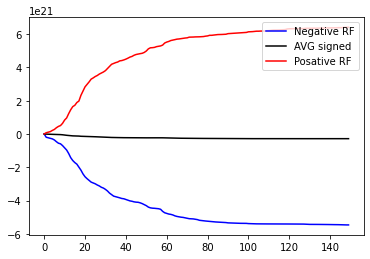

In [60]:
plt.plot(flx8_0, label = 'Negative RF',color ='blue' )
plt.plot(flx8_1, label ='AVG signed ', color = 'black')
plt.plot(flx8_2, label= 'Posative RF', color = 'red')
plt.legend(loc = 'upper right')


In [76]:
rdbflx,rdbrflx,rdbt,rdbtt,area8,n_o_satpix,ar_area = extract_RDB(flare_data)

In [78]:
flare_data.area8.shape

(3, 150)

In [81]:
area8_0=flare_data.area8[0]
area8_1=flare_data.area8[1]
area8_2=flare_data.area8[2]

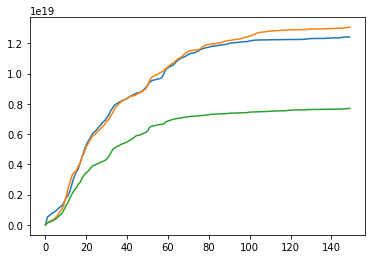

In [83]:
plt.plot(area8_0)
plt.plot(area8_1)
plt.plot(area8_2)

In [87]:
flare_data.area8[2]

array([0.0000000e+00, 1.3858006e+17, 1.9127951e+17, 2.3812348e+17,
       3.1229309e+17, 3.8255902e+17, 4.9771710e+17, 6.3044169e+17,
       7.3974428e+17, 9.7786771e+17, 1.2589315e+18, 1.4658256e+18,
       1.7820225e+18, 2.0416161e+18, 2.2719321e+18, 2.4183195e+18,
       2.6759614e+18, 2.8067341e+18, 3.0917016e+18, 3.3044511e+18,
       3.4449830e+18, 3.5620930e+18, 3.7338541e+18, 3.8939045e+18,
       3.9485557e+18, 4.0051588e+18, 4.0637139e+18, 4.1398353e+18,
       4.1769199e+18, 4.2569451e+18, 4.3369703e+18, 4.5204425e+18,
       4.7585659e+18, 4.9849785e+18, 5.0981847e+18, 5.1762578e+18,
       5.2231019e+18, 5.3265489e+18, 5.3655854e+18, 5.4221888e+18,
       5.4787917e+18, 5.5646723e+18, 5.6427459e+18, 5.7266744e+18,
       5.8554954e+18, 5.9101466e+18, 5.9296651e+18, 5.9765087e+18,
       6.0487268e+18, 6.0994742e+18, 6.2048734e+18, 6.4390930e+18,
       6.5249737e+18, 6.5522993e+18, 6.5679140e+18, 6.6147582e+18,
       6.6303723e+18, 6.6420838e+18, 6.6830719e+18, 6.8079891e